## Evaluation of the Stresser Model

In [1]:
import pandas as pd
import json
import numpy as np
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

#### Distribution of words in full data set

In [3]:
full = json.load(open("./data/stresses.json", "r"))
print(len(full))

25468


One-syll words in full dataset: 2543
Two-syll words in full dataset: 8771
Three-syll words in full dataset: 8634
Four-syll words in full dataset: 4069
Five-syll words in full dataset: 1325
Six-syll words in full dataset: 126
Seven-syll words in full dataset: 0


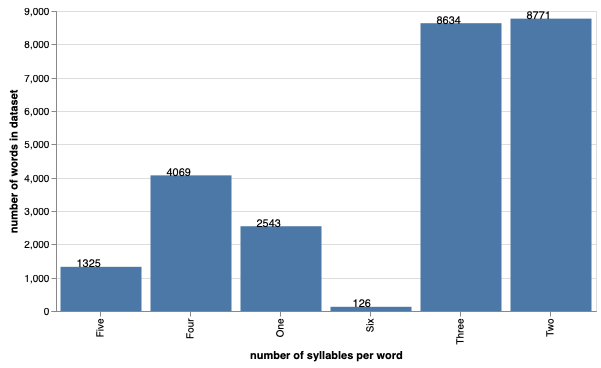

In [4]:
syllabified_words = []
number_of_sylls = []

for d in full.values():
    syllabified_words.append(d['syllabified'])

for item in syllabified_words:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    number_of_sylls.append(cnt)

#print(syllabified_words)
#print(number_of_sylls)

print('One-syll words in full dataset:', number_of_sylls.count(1))
print('Two-syll words in full dataset:', number_of_sylls.count(2))
print('Three-syll words in full dataset:', number_of_sylls.count(3))
print('Four-syll words in full dataset:', number_of_sylls.count(4))
print('Five-syll words in full dataset:', number_of_sylls.count(5))
print('Six-syll words in full dataset:', number_of_sylls.count(6))
print('Seven-syll words in full dataset:', number_of_sylls.count(7))


source = pd.DataFrame({
    'number of syllables per word': ['One', 'Two', 'Three', 'Four', 'Five', 'Six'],
    'number of words in dataset': [number_of_sylls.count(1), number_of_sylls.count(2),
          number_of_sylls.count(3), number_of_sylls.count(4), 
          number_of_sylls.count(5), number_of_sylls.count(6)]
})

chart = alt.Chart(source).mark_bar().encode(
    x='number of syllables per word',
    y='number of words in dataset')

text = chart.mark_text(
    align='right'
).encode(
    text='number of words in dataset'
)

chart + text

#### Loading gold and silver datasets for evaluation

In [5]:
gold = json.load(open("./data/splits/test.json", "r"))
silver = json.load(open("model_s/silver_test.json", "r"))

items_gold = [value["syllabified"] for value in gold]
items_silver = [value["syllabified"] for value in silver]

#### Convert to dataframes

In [6]:
df_gold = pd.DataFrame(value["syllabified"] for value in gold)
df_gold = df_gold.rename(index=str, columns={0: "gold_syllabification"})
#print(df_gold.head())
print('Total number of words in gold:', len(df_gold))

df_silver = pd.DataFrame(value["syllabified"] for value in silver)
df_silver = df_silver.rename(index=str, columns={0: "silver_syllabification"})
#print(df_silver.head())
print('Total number of words in silver:', len(df_silver))

Total number of words in gold: 2547
Total number of words in silver: 2547


#### General comparison between gold and silver dataframes

In [7]:
diff_keys = set(items_silver) ^ set(items_gold)
print('Mistakes are made against the syllabification these words:', diff_keys)

Mistakes are made against the syllabification these words: {'oc-tou-ia-ne', 'co-ninck-rijck', 'vic-to-ri-a-le', 'des-pi-te', 'bert-ram', 'clot-hilt', 'fas-ia-te-ne', 'janu-a-ri', 'clot-hil-de', 'bei-a-gen', 'a-ne-ge-si-en', 'jsra-hel', 'cen-tu-ri-oen', 'a-chis-tes', 'his-tor-ia-le', 'mo-ghendt-he-den', 'gouts-me-de', 'ber-tram', 'ha-spe-gu-we', 'hant-wercs-lie-den', 'u-ye-re', 'lim-borc-he-ren', 'da-ni-e-le', 'gout-sme-de', 'car-na-ci-oen', 'dy-o-cle-si-yen', 'be-ie-ren', 'an-ac-ho-ri-te', 'toe-si-en', 'vis-ioen', 'bei-e-ren', 'wae-rach-te-li-ke', 'uye-re', 'waer-ach-te-li-ke', 'has-pe-gu-we', 'bro-ad-as', 'con-trei-e', 'dy-o-cle-siy-en', 'ghe-dy-en', 'ga-len-tey-e', 'gra-cieus', 'da-nie-le', 'hue-schei-de', 'a-l-an-gre-mant', 'moa-bi-ten', 'broa-das', 'or-ghe-lieus', 'bin-nen-di-en', 'wij-ste', 'vi-si-oen', 'fa-si-a-te-ne', 'be-ia-gen', 'fa-iu-wee-le', 'be-smet', 'is-maë-li-te', 'a-mo-re-us', 'ja-nu-a-ri', 'gra-ci-eus', 'js-ra-hel', 'ke-ye', 'joan-ne', 'mo-ghendthe-den', 'jo-su-e', 'u

In [8]:
result = pd.concat([df_gold, df_silver], axis=1)
result['correct?'] = (result['silver_syllabification'] == result['gold_syllabification'])

value_counts = (result.gold_syllabification == result.silver_syllabification).value_counts()
print(value_counts)

True     2482
False      65
dtype: int64


#### Print dataframe with mistakes

In [9]:
result = pd.concat([df_gold, df_silver], axis=1)
result['correct?'] = (result['silver_syllabification'] == result['gold_syllabification'])

true_false = result.set_index('correct?')
mistakes = true_false.loc[False]
mistakes

,gold_syllabification,silver_syllabification
correct?,,
False,fas-ia-te-ne,fa-si-a-te-ne
False,a-thee-ne,at-hee-ne
False,bei-a-gen,be-ia-gen
False,de-spi-te,des-pi-te
False,a-mo-reus,a-mo-re-us
False,lim-bor-che-ren,lim-borc-he-ren
False,a-lan-gre-mant,a-l-an-gre-mant
False,char-et-te,cha-ret-te
False,ura-ken,u-ra-ken


#### Expand dataframe with information about syllable counts

In [10]:
num_sylls_gold = []
num_sylls_silver = []


for item in items_gold:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    num_sylls_gold.append(cnt)


for item in items_silver:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    num_sylls_silver.append(cnt)
    
# Make df's

df_gold_syll_count = pd.DataFrame(num_sylls_gold)
df_gold_syll_count = df_gold_syll_count.rename(index=str, columns={0: "num_sylls_gold"})

df_silver_syll_count = pd.DataFrame(num_sylls_silver)
df_silver_syll_count = df_silver_syll_count.rename(index=str, columns={0: "num_sylls_silver"})

result_sylls = pd.concat([df_gold_syll_count, df_gold, df_silver_syll_count, df_silver], axis=1)

result_sylls['correct?'] = (df_gold_syll_count['num_sylls_gold'] == df_silver_syll_count['num_sylls_silver'])

x = result_sylls.set_index('correct?')
mistakes_number_of_sylls = x.loc[False]
mistakes_number_of_sylls
#print(mistakes_number_of_sylls)
print('Incorrect predictions about the number of syllables in a word:', len(mistakes_number_of_sylls), '(out of a total of', len(items_gold), 'words).')

Incorrect predictions about the number of syllables in a word: 35 (out of a total of 2547 words).


#### Calculate accuracy for mono- and polysyllable words

In [11]:
cnt_1syllable_words = 0
cnt_2syllable_words = 0
cnt_3syllable_words = 0
cnt_4syllable_words = 0
cnt_5syllable_words = 0
cnt_6syllable_words = 0
cnt_7syllable_words = 0


for item in items_gold:
    num_syl_word = item.split("-")
    if len(num_syl_word) == 1:
        cnt_1syllable_words += 1
    elif len(num_syl_word) == 2:
        cnt_2syllable_words += 1
    elif len(num_syl_word) == 3:
        cnt_3syllable_words += 1
    elif len(num_syl_word) == 4:
        cnt_4syllable_words += 1
    elif len(num_syl_word) == 5:
        cnt_5syllable_words += 1
    elif len(num_syl_word) == 6:
        cnt_6syllable_words += 1
    elif len(num_syl_word) == 7:
        cnt_7syllable_words += 1
        

cnt_1syllable_words_mistakes = 0
cnt_2syllable_words_mistakes = 0
cnt_3syllable_words_mistakes = 0
cnt_4syllable_words_mistakes = 0
cnt_5syllable_words_mistakes = 0
cnt_6syllable_words_mistakes = 0
cnt_7syllable_words_mistakes = 0


if len(num_sylls_gold) == len(num_sylls_silver):
    for i in range(len(num_sylls_gold)):
        if num_sylls_gold[i] == 1 and num_sylls_silver[i] != 1:
            cnt_1syllable_words_mistakes += 1
        if num_sylls_gold[i] == 2 and num_sylls_silver[i] != 2:
            cnt_2syllable_words_mistakes += 1
        if num_sylls_gold[i] == 3 and num_sylls_silver[i] != 3:
            cnt_3syllable_words_mistakes += 1
        if num_sylls_gold[i] == 4 and num_sylls_silver[i] != 4:
            cnt_4syllable_words_mistakes += 1
        if num_sylls_gold[i] == 5 and num_sylls_silver[i] != 5:
            cnt_5syllable_words_mistakes += 1
        if num_sylls_gold[i] == 6 and num_sylls_silver[i] != 6:
            cnt_6syllable_words_mistakes += 1
        if num_sylls_gold[i] == 7 and num_sylls_silver[i] != 7:
            cnt_7syllable_words_mistakes += 1

print('Total number of 1syllabic words:', cnt_1syllable_words, 'Mistakes:', cnt_1syllable_words_mistakes)
print('Total number of 2syllabic words:', cnt_2syllable_words, 'Mistakes:', cnt_2syllable_words_mistakes)
print('Total number of 3syllabic words:', cnt_3syllable_words, 'Mistakes:', cnt_3syllable_words_mistakes)
print('Total number of 4syllabic words:', cnt_4syllable_words, 'Mistakes:', cnt_4syllable_words_mistakes)
print('Total number of 5syllabic words:', cnt_5syllable_words, 'Mistakes:', cnt_5syllable_words_mistakes)
print('Total number of 6syllabic words:', cnt_6syllable_words, 'Mistakes:', cnt_6syllable_words_mistakes)
print('Total number of 7syllabic words:', cnt_7syllable_words, 'Mistakes:', cnt_7syllable_words_mistakes)    

try:
            
    print('Accuracy syllabification of one-syllable words:', float(100-cnt_1syllable_words_mistakes/cnt_1syllable_words))
    print('Accuracy syllabification of two-syllable words:', float(100-cnt_2syllable_words_mistakes/cnt_2syllable_words))
    print('Accuracy syllabification of three-syllable words:', float(100-cnt_3syllable_words_mistakes/cnt_3syllable_words))
    print('Accuracy syllabification of four-syllable words:', float(100-cnt_4syllable_words_mistakes/cnt_4syllable_words))
    print('Accuracy syllabification of five-syllable words:', float(100-cnt_5syllable_words_mistakes/cnt_5syllable_words))
    print('Accuracy syllabification of six-syllable words:', float(100-cnt_6syllable_words_mistakes/cnt_6syllable_words))
    print('Accuracy syllabification of seven-syllable words:', float(100-cnt_7syllable_words_mistakes/cnt_7syllable_words))

except ZeroDivisionError:
    print("You can't divide by zero!")

Total number of 1syllabic words: 282 Mistakes: 0
Total number of 2syllabic words: 906 Mistakes: 9
Total number of 3syllabic words: 824 Mistakes: 9
Total number of 4syllabic words: 418 Mistakes: 15
Total number of 5syllabic words: 106 Mistakes: 2
Total number of 6syllabic words: 11 Mistakes: 0
Total number of 7syllabic words: 0 Mistakes: 0
Accuracy syllabification of one-syllable words: 100.0
Accuracy syllabification of two-syllable words: 99.99006622516556
Accuracy syllabification of three-syllable words: 99.98907766990291
Accuracy syllabification of four-syllable words: 99.96411483253588
Accuracy syllabification of five-syllable words: 99.98113207547169
Accuracy syllabification of six-syllable words: 100.0
You can't divide by zero!


#### Analysis of stress pattern predictions

In [25]:
gold = json.load(open("./data/splits/test.json", "r"))
silver = json.load(open("model_s/silver_test.json", "r"))

items_gold_human_annotation = [value["human_annotation"] for value in gold]
items_gold_corrected_stress = [value["corrected_stress"] for value in gold]
items__gold_patterns = [value["patterns"] for value in gold]


print(items_gold_human_annotation)
#for d in items_gold_human_annotation.values():
 #   if d is not None:
  #      print(d)
        

#human annotation
#corrected_stress
#patterns

#srtress_silver = [value["syllabified"] for value in silver]

[None, None, None, None, None, None, None, None, [-4, -2], None, [-4, -1], None, None, None, None, None, None, -2, None, None, None, None, -2, None, None, None, [-4, -2], None, [-4, -2], None, None, None, None, None, None, None, None, None, None, None, None, None, [-5, -3], None, -2, None, -3, None, [-3, -1], None, -2, None, None, None, None, None, [-3, -1], None, None, None, -2, None, None, None, None, [-3, -1], [-3, -1], None, None, None, None, None, None, None, -2, None, None, None, None, None, [-4, -2], None, [-4, -2], None, [-4, -2], None, None, None, None, [-3, -1], None, [-4, -2], None, None, [-3, -1], None, None, [-3, -1], None, [-4, -2], [-5, -2], None, None, [-3, -1], None, None, [-4, -2], -3, None, [-4, -2], None, [-4, -2], None, None, None, None, [-5, -2], None, [-4, -2], None, None, None, [-3, -1], None, [-3, -1], [-4, -1], None, None, None, None, None, None, None, None, None, None, None, -2, None, None, [-4, -2], None, None, None, None, [-3, -1], None, None, None, None, N